### 0 数据探索

首先，我们对数据集进行快速浏览和查看，以对我们数据分析的对象有大致的“感观”。

In [294]:
# 加载函数库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 显示配置
%matplotlib inline
plt.rcParams['font.family']=['SimHei'] #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [295]:
data = pd.read_excel('应用系统负载分析与磁盘容量预测.xls')

In [296]:
# 前五行数据预览
data.head()

,SYS_NAME,NAME,TARGET_ID,DESCRIPTION,ENTITY,VALUE,COLLECTTIME
0,财务管理系统,CWXT_DB,184,磁盘已使用大小,C:\,3.427079e+07,2014-10-01
1,财务管理系统,CWXT_DB,184,磁盘已使用大小,D:\,8.026259e+07,2014-10-01
2,财务管理系统,CWXT_DB,183,磁盘容量,C:\,5.232332e+07,2014-10-01
3,财务管理系统,CWXT_DB,183,磁盘容量,D:\,1.572833e+08,2014-10-01
4,财务管理系统,CWXT_DB,184,磁盘已使用大小,C:\,3.432890e+07,2014-10-02


In [297]:
# 基本属性信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
SYS_NAME       188 non-null object
NAME           188 non-null object
TARGET_ID      188 non-null int64
DESCRIPTION    188 non-null object
ENTITY         188 non-null object
VALUE          188 non-null float64
COLLECTTIME    188 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 7.4+ KB


In [298]:
# 数值属性的中心趋势度量1
data.describe()

,TARGET_ID,VALUE
count,188.000000,1.880000e+02
mean,183.500000,8.230415e+07
std,0.501335,4.698926e+07
min,183.000000,3.321187e+07
25%,183.000000,4.816875e+07
50%,183.500000,6.629296e+07
75%,184.000000,1.066458e+08
max,184.000000,1.572833e+08


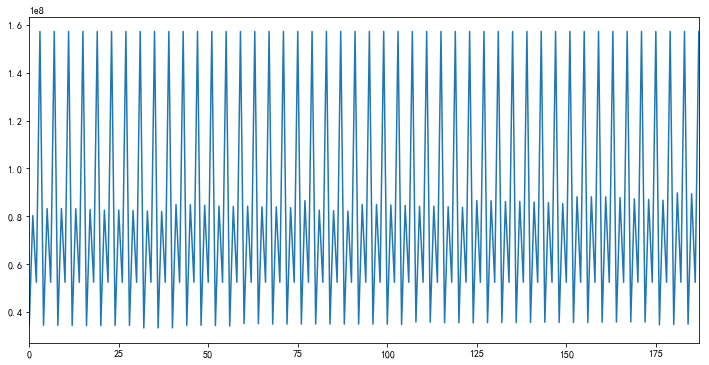

In [299]:
#　数值属性的简单图示
plt.figure(figsize=(12,6))
data['VALUE'].plot()
plt.show()

目前看起来只是没有特别异常的数据点。我们继续对具体C/D盘的存储数据进行探索。

**首先看看C/D盘的磁盘容量数据**，我们期待看到这个数据值的变化应该不大

In [300]:
# 获取C盘磁盘容量 (注意转义字符的使用)
disk_storage = data.loc[(data['ENTITY'] == 'C:\\') & (data['TARGET_ID'] == 183),['COLLECTTIME','VALUE']]
disk_storage.set_index('COLLECTTIME',inplace = True)
disk_storage.columns = ['VALUE_C']
disk_storage.head()

,VALUE_C
COLLECTTIME,
2014-10-01,52323324.0
2014-10-02,52323324.0
2014-10-03,52323324.0
2014-10-04,52323324.0
2014-10-05,52323324.0


In [301]:
# 获取D盘磁盘容量 (注意转义字符的使用)
disk_storage['VALUE_D'] = data.loc[(data['ENTITY'] == 'D:\\') & (data['TARGET_ID'] == 183), ['VALUE']].values
disk_storage.head()

,VALUE_C,VALUE_D
COLLECTTIME,,
2014-10-01,52323324.0,157283328.0
2014-10-02,52323324.0,157283328.0
2014-10-03,52323324.0,157283328.0
2014-10-04,52323324.0,157283328.0
2014-10-05,52323324.0,157283328.0


<Figure size 864x432 with 0 Axes>

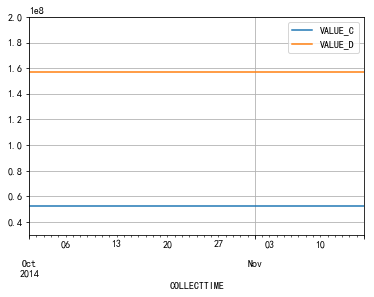

In [302]:
# 简单的图示
plt.figure(figsize=(12,6))
disk_storage[["VALUE_C", "VALUE_D"]].plot()
plt.ylim([0.3e+8, 2e+8])
plt.grid()
plt.show()

<hr>

其次，我们来观察一下C/D磁盘的已可用存储使用变化情况。

In [303]:
# 获取C盘已使用情况
disk_usage = data.loc[(data['ENTITY'] == 'C:\\') & (data['TARGET_ID'] == 184),['COLLECTTIME','VALUE']]
disk_usage.set_index('COLLECTTIME',inplace = True)
disk_usage.columns = ['VALUE_C']
disk_usage.head()

,VALUE_C
COLLECTTIME,
2014-10-01,34270787.33
2014-10-02,34328899.02
2014-10-03,34327553.50
2014-10-04,34288672.21
2014-10-05,34190978.41


In [304]:
# 获取D盘已使用情况
disk_usage['VALUE_D'] = data.loc[(data['ENTITY'] == 'D:\\') & (data['TARGET_ID'] == 184),['VALUE']].values
disk_usage.head()

,VALUE_C,VALUE_D
COLLECTTIME,,
2014-10-01,34270787.33,80262592.65
2014-10-02,34328899.02,83200151.65
2014-10-03,34327553.50,83208320.00
2014-10-04,34288672.21,83099271.65
2014-10-05,34190978.41,82765171.65


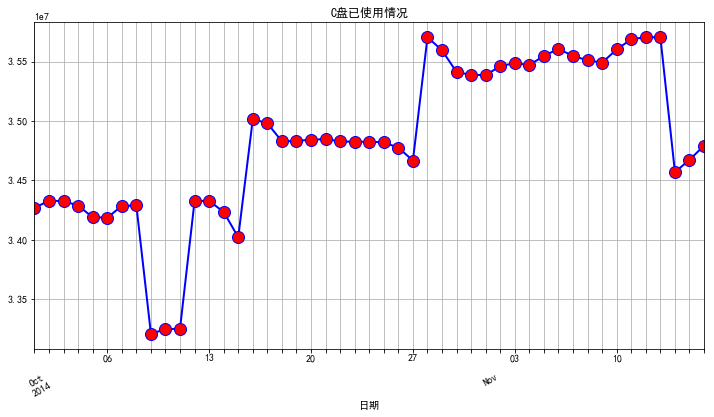

In [305]:
# 简单的图示
plt.figure(figsize=(12,6))
disk_usage["VALUE_C"].plot(color='blue',linewidth=2.0,linestyle='-',marker='o',markersize=12,markerfacecolor='r')
plt.title("C盘已使用情况")
plt.xlabel('日期')
plt.xticks(disk_usage.index, rotation = 30)
plt.grid()
plt.show()

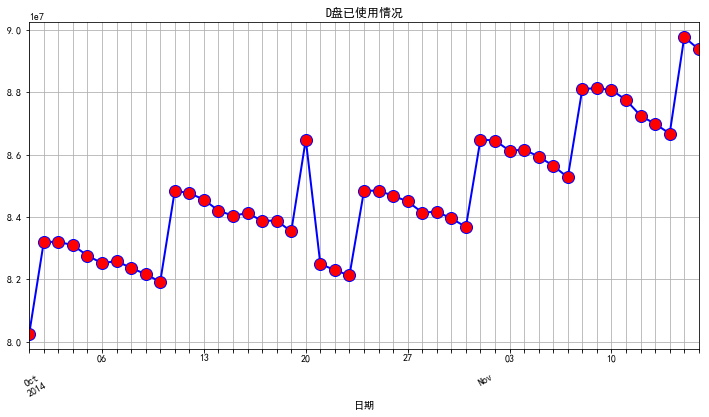

In [306]:
# 简单的图示
plt.figure(figsize=(12,6))
disk_usage["VALUE_D"].plot(color='blue',linewidth=2.0,linestyle='-',marker='o',markersize=12,markerfacecolor='r')
plt.title("D盘已使用情况")
plt.xlabel('日期')
plt.xticks(disk_usage.index, rotation = 30)
plt.grid()
plt.show()

再次检查一下到目前为止经过整理的数据

In [307]:
disk_usage.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47 entries, 2014-10-01 to 2014-11-16
Data columns (total 2 columns):
VALUE_C    47 non-null float64
VALUE_D    47 non-null float64
dtypes: float64(2)
memory usage: 1.1 KB


In [308]:
disk_usage.describe()

,VALUE_C,VALUE_D
count,4.700000e+01,4.700000e+01
mean,3.483490e+07,8.477504e+07
std,6.716905e+05,2.115162e+06
min,3.321187e+07,8.026259e+07
25%,3.432781e+07,8.320424e+07
50%,3.482887e+07,8.450061e+07
75%,3.547896e+07,8.630771e+07
max,3.570501e+07,8.976660e+07


<hr>

### 1. 数据预处理

对于时间序列数据，我们首先计算该时间序列的相关性；主要是自相关和偏自相关性。

**自相关（autocorrelation 或者 ACF）**，也叫序列相关，是一个信号于其自身在不同时间点的相关度。非正式地来说，它就是两次观察之间的相似度对它们之间的时间差的函数。它是找出重复模式（如被噪声掩盖的周期信号），或识别隐含在信号谐波频率中消失的基频的数学工具。它常用于信号处理中，用来分析函数或一系列值，如时域信号。

**偏自相关（partial autocorrelation）**的是在排除了其他变量干扰的情况下，单独研究特定某两个变量之间的关系；比如，偏相关系数为负值说明在排除了其他变量影响的情况下，对于两个变量，一个变量的增加引起另一个变量的减少。在自相关性计算过程中，算出滞后k的自相关系数 时，实际上得到并不是Z(t)与Z(t-k)之间单纯的相关关系。因为Z(t)同时还会受到中间k-1个随机变量Z(t-1)、Z(t-2)、……、Z(t-k+1)的影响，而这k-1个随机变量又都和z(t-k)具有相关关系，所以**自相关系数**里面实际掺杂了其他变量对Z(t)与Z(t-k)的影响。

为了能单纯测度Z(t-k)对Z(t)的影响，引进**偏自相关系数（PACF）**的概念。对于平稳时间序列{Z(t)}，所谓滞后k偏自相关系数指在给定中间k-1个随机变量Z(t-1)、Z(t-2)、……、Z(t-k+1)的条件下，或者说，在剔除了中间k-1个随机变量Z(t-1)、Z(t-2)、……、Z(t-k+1)的干扰之后，Z(t-k)对Z(t)影响的相关程度。

参考资料：
1. <a href='https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/' target='_blank'>A Gentle Introduction to Autocorrelation and Partial Autocorrelation</a>
2. <a href='https://zhuanlan.zhihu.com/p/54153963' target='_blank'>时间序列（一）：平稳性、自相关函数与LB检验</a>
3. <a href='https://blog.csdn.net/Yuting_Sunshine/article/details/95317735' target='_blank'>如何理解自相关和偏自相关图</a>

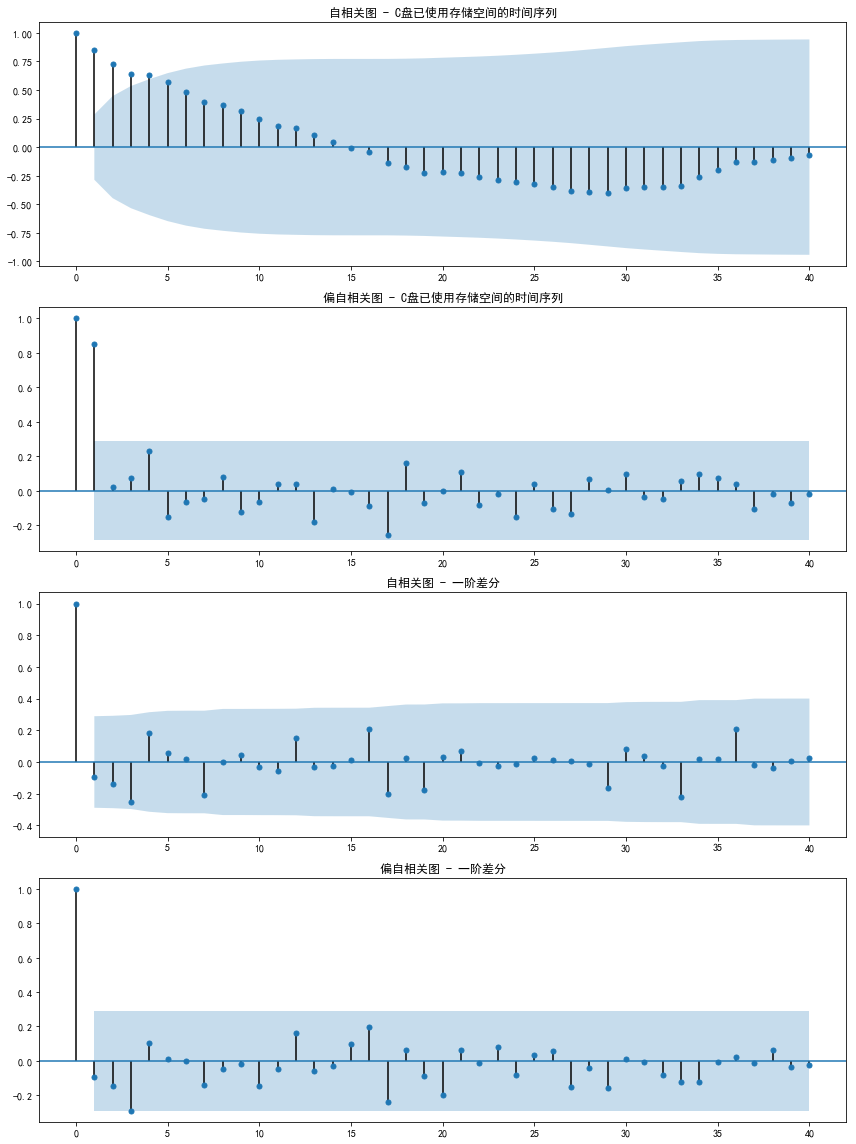

In [309]:
# 自相关与偏相关 - C盘
import statsmodels.api as sm

C_usage = disk_usage['VALUE_C']
fig = plt.figure(figsize = (12,16))
ax1 = fig.add_subplot(411)
sm.graphics.tsa.plot_acf(C_usage, lags = 40, ax = ax1)
ax1.set_title('自相关图 - C盘已使用存储空间的时间序列')

ax2 = fig.add_subplot(412)
sm.graphics.tsa.plot_pacf(C_usage, lags = 40, ax = ax2)
ax2.set_title('偏自相关图 - C盘已使用存储空间的时间序列')

#一阶差分后去空值取自相关系数
C_usage_diff = C_usage.diff(1).dropna() 
ax3 = fig.add_subplot(413)
sm.graphics.tsa.plot_acf(C_usage_diff, lags = 40, ax = ax3)
ax3.set_title('自相关图 - 一阶差分')

ax4 = fig.add_subplot(414)
sm.graphics.tsa.plot_pacf(C_usage_diff, lags = 40, ax = ax4)
ax4.set_title('偏自相关图 - 一阶差分')

plt.tight_layout()
plt.show()

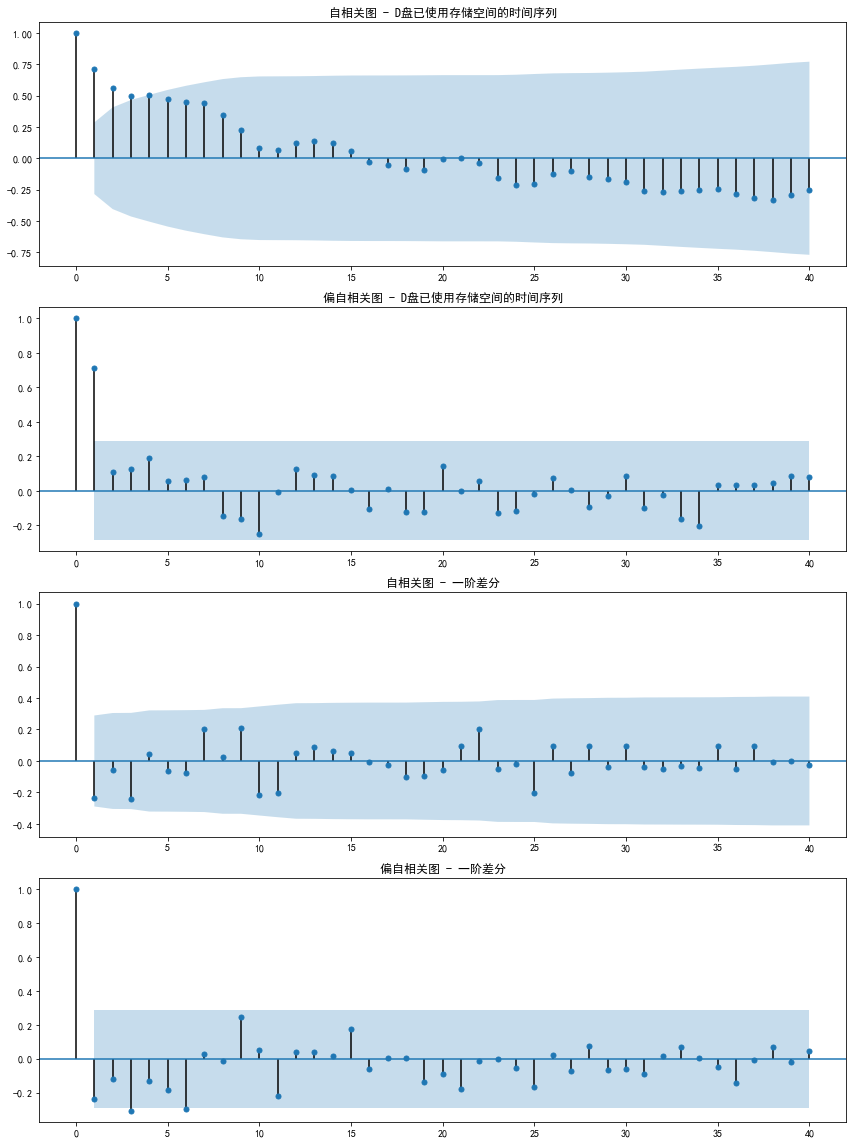

In [310]:
# 自相关与偏相关 - D盘
D_usage = disk_usage['VALUE_D']
fig = plt.figure(figsize = (12,16))
ax1 = fig.add_subplot(411)
sm.graphics.tsa.plot_acf(D_usage, lags = 40, ax = ax1)
ax1.set_title('自相关图 - D盘已使用存储空间的时间序列')

ax2 = fig.add_subplot(412)
sm.graphics.tsa.plot_pacf(D_usage, lags = 40, ax = ax2)
ax2.set_title('偏自相关图 - D盘已使用存储空间的时间序列')

#一阶差分后去空值取自相关系数
D_usage_diff = D_usage.diff(1).dropna() 
ax3 = fig.add_subplot(413)
sm.graphics.tsa.plot_acf(D_usage_diff, lags = 40, ax = ax3)
ax3.set_title('自相关图 - 一阶差分')

ax4 = fig.add_subplot(414)
sm.graphics.tsa.plot_pacf(D_usage_diff, lags = 40, ax = ax4)
ax4.set_title('偏自相关图 - 一阶差分')

plt.tight_layout()
plt.show()

<hr>

我们需要进一步对**时间序列的平稳性进行测试**. 

1. **什么是平稳性呢？**直观上看当数据没有明显的模式特征的话（趋势性、季节性），我们认为它是平稳的。定义上“平稳”指固定时间和位置的概率分布与所有时间和位置的概率分布相同的随机过程。其数学期望和方差这些参数也不随时间和位置变化。在统计模型中，我们一般用ADF检验来测试时间序列的平稳性。

2. **为什么要做平稳性测试呢？**平稳是自回归模型ARMA的必要条件，因此对于时间序列，首先要保证应用自回归的差分序列是平稳的。

3. **如何对时间序列做平稳性测试呢？** 迪基-福勒检验（Dickey-Fuller test）和扩展迪基-福勒检验（Augmented Dickey-Fuller test 或ADF）可以测试一个自回归模型ARMA是否存在单位根（unit root）。数学上可以证明，时间序列中存在单位根过程就不平稳，会使回归分析中存在伪回归。

参考资料：
1. <a href='https://pengfoo.com/post/machine-learning/2017-01-24' target='_blank'>Python时间序列平稳检验--ADF检验</a>
2. <a href='https://baike.baidu.com/item/%E5%B9%B3%E7%A8%B3%E9%9A%8F%E6%9C%BA%E8%BF%87%E7%A8%8B' target='_blank'>平稳随机过程</a>

In [311]:
# ADF检验  
# 注意：预留最后5个数字用于对模型性能进行评估
data = disk_usage.iloc[:len(disk_usage)-5]

#平稳性测试函数
from statsmodels.tsa.stattools import adfuller as ADF
diff = 0 
adf = ADF(data['VALUE_C'])

#adf[1]为p值，p值小于0.05认为是平稳的
while adf[1] >= 0.05:
    diff = diff + 1
    adf = ADF(data['VALUE_C'].diff(diff).dropna())
    
print('C盘已使用存储空间的时间序列经过%s阶差分后归于平稳，p值为%s' % (diff,adf[1]))

C盘已使用存储空间的时间序列经过1阶差分后归于平稳，p值为9.572975592333248e-07


In [312]:
diff = 0 
adf = ADF(data['VALUE_D'])

#adf[1]为p值，p值小于0.05认为是平稳的
while adf[1] >= 0.05:
    diff = diff + 1
    adf = ADF(data['VALUE_D'].diff(diff).dropna())
    
print('D盘已使用存储空间的时间序列经过%s阶差分后归于平稳，p值为%s' % (diff,adf[1]))

D盘已使用存储空间的时间序列经过1阶差分后归于平稳，p值为4.79259126339371e-07


<hr>

经过ADF检验，我们可以认为C/D盘已使用存储空间的时间序列都是稳定的时间序列。下面进行白噪声测试

1. **什么是白噪声?** 随机变量X（t）（t=1，2，3……），如果是由一个不相关的随机变量的序列构成的，即对于所有s≠k，随机变量X(s)和X(k)的协方差为零，则称其为纯随机过程。如果一个纯随机过程的期望和方差均为常数，则称之为白噪声过程。白噪声过程的样本实称成为白噪声序列，简称白噪声。
2. **为什么要做白噪声测试?** 因为白噪声无法预测，所有自相关接近零。如果某个时间序列是白噪声，那么任何回归分析都是没有意义的！
3. **如何对时间序列做白噪声测试?** 原理上还是依赖于序列的自相关性；比如acorr_ljungbox方法

In [313]:
# 白噪声检验
# LB统计量
from statsmodels.stats.diagnostic import acorr_ljungbox

[[lb],[p]] = acorr_ljungbox(data['VALUE_C'], lags=1)
if p < 0.05:
    print('C盘已使用存储空间的时间序列为 非白噪声序列，对应的p值为：%s'%p)
else:
    print('C盘已使用存储空间的时间序列为 白噪声序列，对应的p值为：%s'%p)
    
[[lb],[p]] = acorr_ljungbox(data['VALUE_C'].diff(1).dropna(),lags=1)
if p < 0.05:
    print('其一阶差分序列为 非白噪声序列，对应的p值为：%s'%p)
else:
    print('其一阶差分为 白噪声序列，对应的p值为：%s'%p)

C盘已使用存储空间的时间序列为 非白噪声序列，对应的p值为：1.0609907508070775e-08
其一阶差分为 白噪声序列，对应的p值为：0.4745522552554281


In [314]:
[[lb],[p]] = acorr_ljungbox(data['VALUE_D'], lags=1)
if p < 0.05:
    print('D盘已使用存储空间的时间序列为 非白噪声序列，对应的p值为：%s'%p)
else:
    print('D盘已使用存储空间的时间序列为 白噪声序列，对应的p值为：%s'%p)
    
[[lb],[p]] = acorr_ljungbox(data['VALUE_D'].diff(1).dropna(),lags=1)
if p < 0.05:
    print('其一阶差分序列为 非白噪声序列，对应的p值为：%s'%p)
else:
    print('其一阶差分为 白噪声序列，对应的p值为：%s'%p)

D盘已使用存储空间的时间序列为 非白噪声序列，对应的p值为：9.95850372977218e-06
其一阶差分为 白噪声序列，对应的p值为：0.1143302597764247


### 2. 时间序列建模

传统的时间序列建模采用ARIMA模型，即Auto Regressive Integrated Moving Average模型。这是一个包括多个子模型的家族，如下
1. 自回归模型（AR）：用变量自身的历史时间数据对变量进行回归，从而预测变量未来的时间数据。
2. 移动平均模型（MA）：移动平均模型关注的是误差项的累加，能够有效消除预测中的随机波动。
3. 自回归移动平均模型（ARMA）：多阶数的AR和MA模型
4. 自回归差分移动平均模型（ARIMA）：带差分计算的ARMA
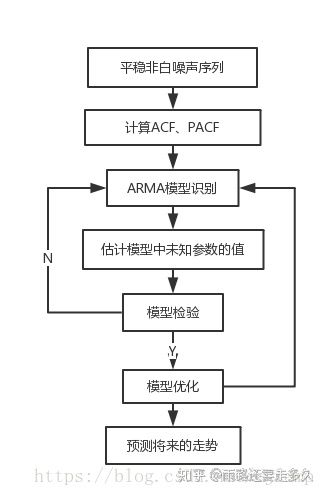

我们将用ARIMA模型在本例中基于时间序列进行预测；基本步骤如下
1. 对序列绘图，进行 ADF 检验，观察序列是否平稳；
2. 对于非平稳时间序列要先进行 d 阶差分，转化为平稳时间序列
3. 对平稳时间序列分别求得其自相关系数（ACF）和偏自相关系数（PACF），通过对自相关图和偏自相关图的分析，得到最佳的阶数p/q；
4. 基于模型参数d/q/p ，得到ARIMA 模型，最后进行模型检验。

In [315]:
# 获得模型参数 - 最佳p/q值
def arima_para(time_series, d=1):
    """ 对于给定的平稳时间序列，基于BIC指标的ARIMA模型最佳p/q值
    
    d - 差分阶数；默认为1阶
    """
    
    #定阶 
    pmax = int(len(time_series)/10)   #一般阶数不超过length/10
    qmax = int(len(time_series)/10)
    
    bic_matrix = []         #bic矩阵
    for p in range(pmax+1):
        tmp = []
        for q in range(qmax+1):
            try:
                tmp.append(ARIMA(time_series,(p,d,q)).fit().bic)
            except:
                tmp.append(None)
            
        bic_matrix.append(tmp)
    
    bic_matrix = pd.DataFrame(bic_matrix) 
    p,q = bic_matrix.stack().astype('float64').idxmin()
    
    return p, q

In [316]:
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")

x_C = data['VALUE_C']
p_C,q_C  = arima_para(x_C)
print('C盘已使用存储空间的时间序列： ARIMA模型最佳p值和q值为:%s、%s'%(p_C,q_C))

C盘已使用存储空间的时间序列： ARIMA模型最佳p值和q值为:0、0


In [317]:
x_D = data['VALUE_D']
p_D,q_D  = arima_para(x_D)
print('D盘已使用存储空间的时间序列： ARIMA模型最佳p值和q值为:%s、%s'%(p_D,q_D))

D盘已使用存储空间的时间序列： ARIMA模型最佳p值和q值为:0、1


#### 对ARIMI模型进行检验；即判断从时间序列中提取有效信息后剩下的序列是否是白噪声。

In [318]:
# 计算模型预测输出
arima_C = ARIMA(x_C,(p_C,1,q_C)).fit()
x_pred = arima_C.predict(typ='levels')

# 获得原始时间序列的残差
x_err = (x_pred - x_C).dropna()

# 检查残差序列是否是白噪声
lagnum = 12
lb, p = acorr_ljungbox(x_err, lags = lagnum)

# p值小于0.05，认为是非白噪声
h = (p < 0.05).sum()
if h > 0:
    print('C盘已使用存储空间的时间序列: 模型ARIMA（%s,1,%s）不符合白噪声检验'%(p,q))
else:
    print('C盘已使用存储空间的时间序列: 模型ARIMA（%s,1,%s）符合白噪声检验'%(p,q))

C盘已使用存储空间的时间序列: 模型ARIMA（[0.47455226 0.45421413 0.10528567 0.05642716 0.09648414 0.15565755
 0.05479088 0.08700279 0.12206878 0.16186804 0.20217712 0.13953557],1,1）符合白噪声检验


In [319]:
# 计算模型预测输出
arima_D = ARIMA(x_D,(p_D,1,q_D)).fit()
x_pred = arima_D.predict(typ='levels')

# 获得原始时间序列的残差
x_err = (x_pred - x_D).dropna()

# 检查残差序列是否是白噪声
lagnum = 10
lb, p = acorr_ljungbox(x_err, lags = lagnum)

#p值小于0.05，认为是非白噪声
h = (p < 0.05).sum()
if h > 0:
    print('D盘已使用存储空间的时间序列: 模型ARIMA（%s,1,%s）不符合白噪声检验'%(p,q))
else:
    print('D盘已使用存储空间的时间序列: 模型ARIMA（%s,1,%s）符合白噪声检验'%(p,q))

D盘已使用存储空间的时间序列: 模型ARIMA（[0.12693165 0.28086103 0.10578867 0.15967815 0.21700411 0.31311161
 0.29593954 0.2281762  0.18261458 0.12747894],1,1）符合白噪声检验


### 3. 模型预测

基于学得的ARIMA模型预测最后5个数字，并与原始数据进行比较，评估模型性能

In [320]:
# C盘使用情况预测
y_forecast = arima_C.forecast(5)[0]
y_true = disk_usage.iloc[len(disk_usage)-5:]['VALUE_C']

comp_C = pd.DataFrame({"C盘使用预测值":y_forecast, "C盘使用实际值":y_true})
comp_C = comp_C.applymap(lambda x :'%.2f'%x)
comp_C

,C盘使用实际值,C盘使用预测值
COLLECTTIME,,
2014-11-12,35704312.58,35722538.09
2014-11-13,35704980.73,35757103.59
2014-11-14,34570385.45,35791669.08
2014-11-15,34673820.69,35826234.58
2014-11-16,34793245.31,35860800.07


In [321]:
# 性能评估
abs_ = (y_forecast - y_true).abs()
mae_ = abs_.mean()
rmse_ = ((abs_**2).mean())**0.05
mape_ = (abs_/y_true).mean()

print('C盘已使用存储空间的时间序列：\n\n平均绝对误差为：%0.4f,\n均方根误差为：%0.4f,\n平均绝对百分误差为：%0.6f' % (mae_, rmse_, mape_))

C盘已使用存储空间的时间序列：

平均绝对误差为：702320.1312,
均方根误差为：3.9350,
平均绝对百分误差为：0.020243


In [322]:
# D盘使用情况预测
y_forecast = arima_D.forecast(5)[0]
y_true = disk_usage.iloc[len(disk_usage)-5:]['VALUE_D']

comp_D = pd.DataFrame({"D盘使用预测值":y_forecast, "D盘使用实际值":y_true})
comp_D = comp_D.applymap(lambda x :'%.2f'%x)
comp_D

,D盘使用实际值,D盘使用预测值
COLLECTTIME,,
2014-11-12,87249335.55,88034300.15
2014-11-13,86986142.20,88217005.86
2014-11-14,86678240.00,88399711.57
2014-11-15,89766600.00,88582417.27
2014-11-16,89377527.25,88765122.98


In [323]:
# 性能评估
abs_ = (y_forecast - y_true).abs()
mae_ = abs_.mean()
rmse_ = ((abs_**2).mean())**0.05
mape_ = (abs_/y_true).mean()

print('D盘已使用存储空间的时间序列：\n\n平均绝对误差为：%0.4f,\n均方根误差为：%0.4f,\n平均绝对百分误差为：%0.6f' % (mae_, rmse_, mape_))

D盘已使用存储空间的时间序列：

平均绝对误差为：1106777.3644,
均方根误差为：4.0449,
平均绝对百分误差为：0.012610


### 总结

看起来我们模型的性能还不错，因为均方误差和百分比误差都比较低；这也是传统的时间序列分析方法的优势，计算量相对较小速度很快。但是，如果仔细对比预测和实际值，模型的表现还是有待提高。各位同学如有兴趣，还可以利用深度学习里面的RNN/LSTM进行建模，可能会获得更好的结果。